### Pre-requisites

Install gensim using the following command

```pip install -U gensim```

### Overview

***Gensim***: It isn't really a deep learning package. It's a package for word and text similarity modeling, which started with Latent Dirichlet Allocation (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

https://pypi.org/project/gensim/

***Note***: In the notebook the word "word vector" and "embeddings" have been used inter-changeably.

In [1]:
# Import libraries
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

***Glove word vectors***: Stanford offers GloVe word vectors. Gensim doesn't give them first class support, but allows us to convert a file of GloVe vectors into word2vec format. Download the GloVe vectors from https://nlp.stanford.edu/projects/glove/. The stanford Glove vectors comes in 50, 100, 200 and 300 dimensional embeddings.

In [2]:
glove_file = datapath('/home/agoel/Technical/word-vector-visualization/Embeddings/glove.6B/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile('glove.6B.100d.word2vec.txt')
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [4]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [5]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [6]:
model.most_similar('delta')

[('airlines', 0.6570634841918945),
 ('airways', 0.6561009287834167),
 ('alpha', 0.5992738008499146),
 ('airtran', 0.5988513827323914),
 ('northwest', 0.5890648365020752),
 ('airline', 0.5851876735687256),
 ('atlantic', 0.5646671652793884),
 ('theta', 0.557551383972168),
 ('phi', 0.5524804592132568),
 ('carrier', 0.5510194301605225)]

In [7]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
# round off to 4 decimal places
print('{}: {:.4f}'.format(*result[0]))
result

queen: 0.7699


[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755737066268921),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520533561706543),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517116546631),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [9]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [10]:
analogy('japan', 'japanese', 'india')

'indian'

In [11]:
analogy('australia', 'beer', 'france')

'champagne'

In [12]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [13]:
analogy('tall', 'tallest', 'long')

'longest'

In [14]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [16]:
vocab_keys = model.vocab.keys()
print('Number of words in the vocabulary: {}'.format(len(list(vocab_keys))))
print(list(vocab_keys)[0:15])

Number of words in the vocabulary: 400000
['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is']


In [17]:
## Access vector for one word 
print(model['good'])

[-0.030769   0.11993    0.53909   -0.43696   -0.73937   -0.15345
  0.081126  -0.38559   -0.68797   -0.41632   -0.13183   -0.24922
  0.441      0.085919   0.20871   -0.063582   0.062228  -0.051234
 -0.13398    1.1418     0.036526   0.49029   -0.24567   -0.412
  0.12349    0.41336   -0.48397   -0.54243   -0.27787   -0.26015
 -0.38485    0.78656    0.1023    -0.20712    0.40751    0.32026
 -0.51052    0.48362   -0.0099498 -0.38685    0.034975  -0.167
  0.4237    -0.54164   -0.30323   -0.36983    0.082836  -0.52538
 -0.064531  -1.398     -0.14873   -0.35327   -0.1118     1.0912
  0.095864  -2.8129     0.45238    0.46213    1.6012    -0.20837
 -0.27377    0.71197   -1.0754    -0.046974   0.67479   -0.065839
  0.75824    0.39405    0.15507   -0.64719    0.32796   -0.031748
  0.52899   -0.43886    0.67405    0.42136   -0.11981   -0.21777
 -0.29756   -0.1351     0.59898    0.46529   -0.58258   -0.02323
 -1.5442     0.01901   -0.015877   0.024499  -0.58017   -0.67659
 -0.040379  -0.44043    0.0

***PCA:*** It is a non-linear dimensionality reduction technique. This is one of the algorithm to visualize the multi-dimensional(300) data (embeddings) into 2D space. For more information about the fit_transform() function used below, please refer - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [22]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            # list converts dictionary (model.vocab.keys()) into the list of objects
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.vocab]
            
    word_vectors = np.array([model[w] for w in words])
    
    # Rows is Number of words and column is the embedding dimension(100)
    print('word_vectors.shape:', word_vectors.shape)
    
    transform = PCA().fit_transform(word_vectors)
    print('transform.shape: {}'.format(transform.shape))
    
    # Fetch the first two columns of the matrix
    twodim = transform[:,:2]
    print('twodim.shape: {}'.format(twodim.shape))
    
    plt.figure(figsize=(7,7))
    
    # x axis plots the first column of all the rows 
    # and y axis plots the second column of all the rows.
    plt.scatter(twodim[:, 0], twodim[0:,1], edgecolors='k', c='b')
    
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

word_vectors.shape: (46, 100)
transform.shape: (46, 46)
twodim.shape: (46, 2)


<IPython.core.display.Javascript object>


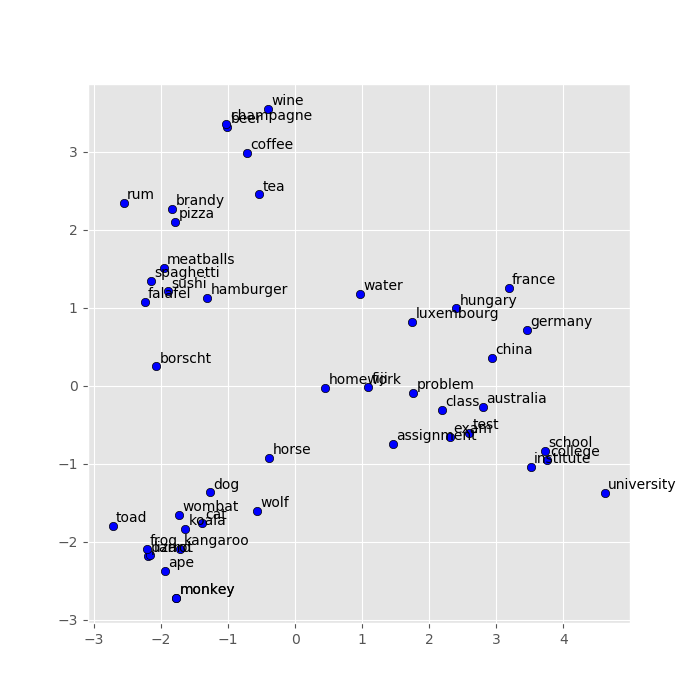

In [23]:
display_pca_scatterplot(model,
        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
         'school', 'college', 'university', 'institute'])

word_vectors.shape: (300, 100)
transform.shape: (300, 100)
twodim.shape: (300, 2)


<IPython.core.display.Javascript object>


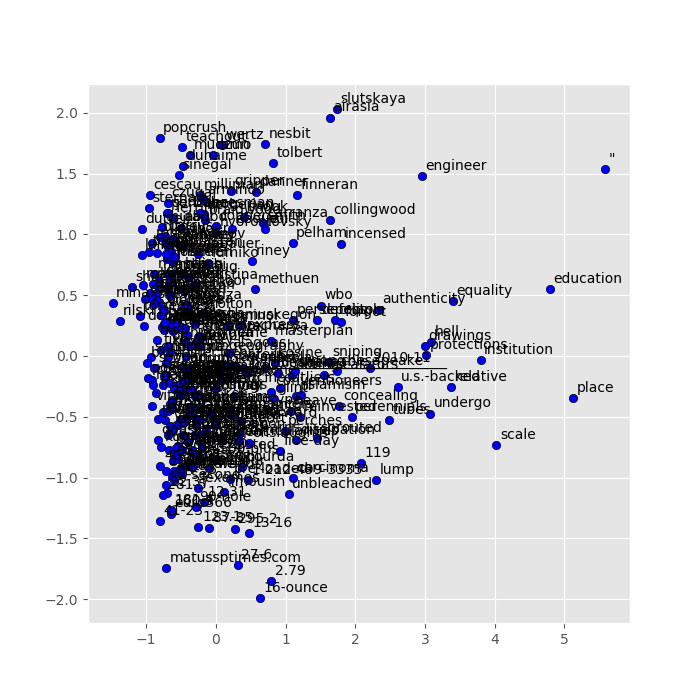

In [24]:
display_pca_scatterplot(model, sample=300)